# Сегментация пользователей по потреблению

Наша задача - проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов.

Необходимо выполнить следующие шаги:
- Провести исследовательский анализ данных,
- Сегментировать пользователей на основе данных о количестве потребляемых продуктов,
- Сформулировать и проверить статистические гипотезы.
    
1. Гипотеза различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
    
2. Гипотеза различия кредитного скоринга между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Ссылка на презентацию: https://disk.yandex.ru/i/YdH7GdP3WPPiOg

Ссылка на дашборд: https://public.tableau.com/app/profile/olga.bashkirtseva/viz/Bank_clients/Dashboard1?publish=yes

<a id='content'></a>
## Оглавление

### Исследовательский анализ данных  
* [Получим данные](#part_0.1)
* [Заменим пропуски в данных](#part_0.2)
* [Посмотрим на распределения признаков](#part_0.3)


### Сегментация  пользователей на основе данных о количестве потребляемых продуктов
* [Разделим клиентов банка на группы по количеству потребляемых продуктов.](#part_1.1)
* [Посмотрим распределения признаков по группам](#part_1.2)


### Формулировка и проверка статистических гипотез
* [Доход тех клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, одинаков](#part_2.1)
* [Баллы кредитного скоринга тех клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, одинаковы](#part_2.2)

### Вывод
* [Сделаем общий вывод](#finish)

# Исследовательский анализ данных
<a id='part_0.1'></a>
Получим данные и подготовим их для дальнейшей работы.

[*Назад к оглавлению*](#content)

In [3]:
%%capture
import sys

!"{sys.executable}" -m pip install phik

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import phik
import matplotlib.ticker as ticker

In [5]:
data = pd.read_csv('/datasets/bank_dataset.csv')

In [6]:
data.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
data['gender_class'] = 0
data.loc[data['gender'] == 'Ж', 'gender_class'] = 1

Посмотрим, есть ли какие-то закономерности в отсутствующих значениях баланса.

array([[<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'objects'}>],
       [<AxesSubplot:title={'center':'products'}>,
        <AxesSubplot:title={'center':'creditcard'}>,
        <AxesSubplot:title={'center':'loyalty'}>],
       [<AxesSubplot:title={'center':'estimated_salary'}>,
        <AxesSubplot:title={'center':'churn'}>,
        <AxesSubplot:title={'center':'gender_class'}>]], dtype=object)

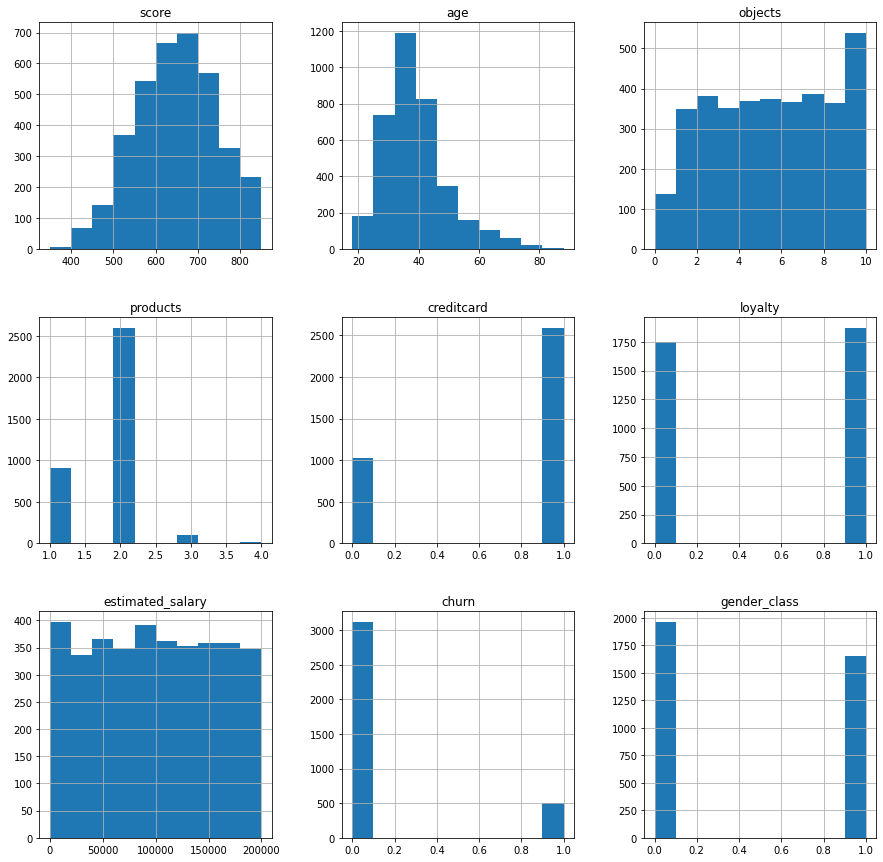

In [10]:
data[data['balance'].isna()].drop(['userid','balance'], axis=1).hist(figsize=(15,15))

Можем заметить, что клиенты с отсутвующим значением баланса очень различны. Скорее всего отстутвие значения в этом поле означает, что у клиента просто нет дебетовой карты, и он пользуется какими-то иными продуктами банка (кредитной картой, арендует банковскую ячейку или же берет кредит).

Заменим значения на нули.

In [11]:
data['balance'] = data['balance'].fillna(0)

<a id='part_0.3'></a>
Посмотрим на распределения признаков.

In [12]:
data.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_class
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.454300
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932
min,1.560844e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'objects'}>],
       [<AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'products'}>,
        <AxesSubplot:title={'center':'creditcard'}>],
       [<AxesSubplot:title={'center':'loyalty'}>,
        <AxesSubplot:title={'center':'estimated_salary'}>,
        <AxesSubplot:title={'center':'churn'}>],
       [<AxesSubplot:title={'center':'gender_class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

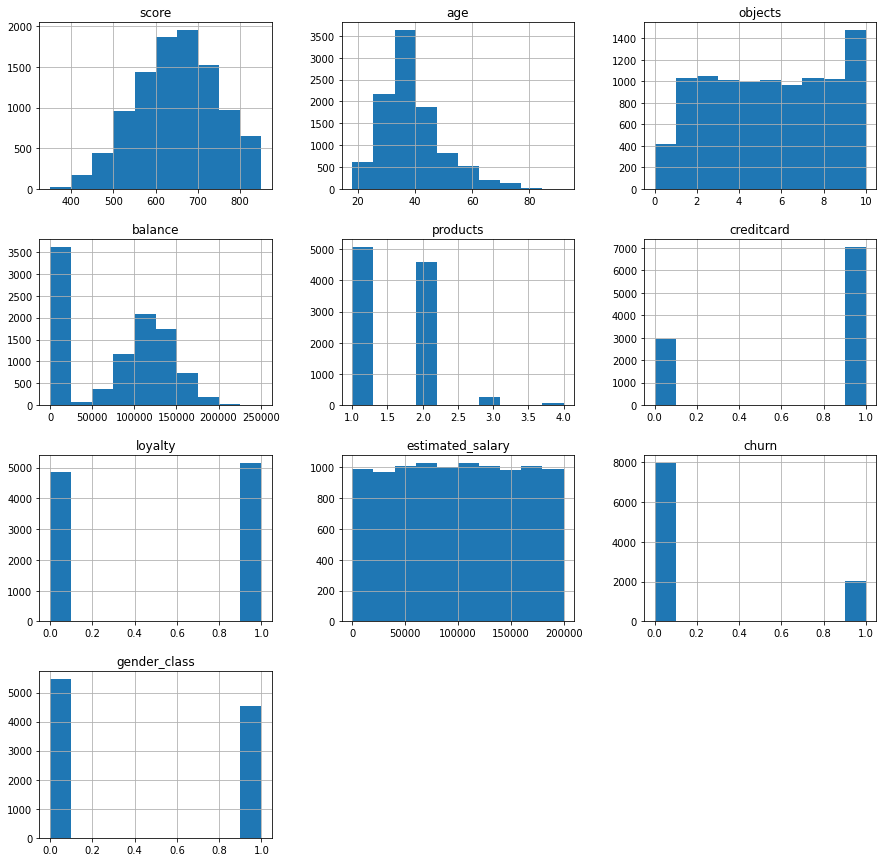

In [13]:
data.drop('userid', axis=1).hist(figsize=(15,15))

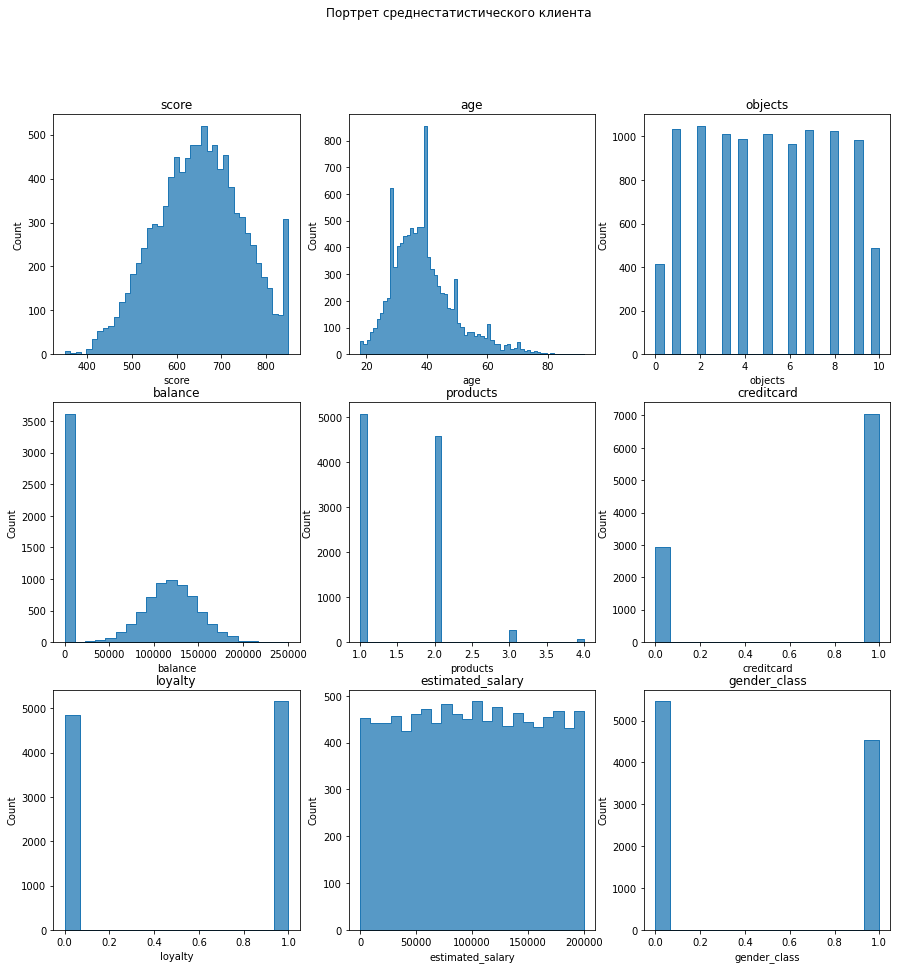

In [14]:
spisok = data.columns.drop(['userid', 'city', 'gender', 'churn'])

fig, axs = plt.subplots(3,3)
fig.suptitle('Портрет среднестатистического клиента')
fig.set_figheight(15)
fig.set_figwidth(15)

a = 0
for i in range(3):
    for j in range(3):
        sns.histplot(ax=axs[i][j], x = spisok[a], 
            data = data[['churn',spisok[a]]], element="step")
        axs[i][j].set_title(spisok[a])
#        axs[i][j].set_major_locator(ticker.AutoLocator())
        a += 1

Можно сделать следующие выводы:
* средний балл кредитного скоринга - 600-700,
* Средний возраст около 39 лет
* По количеству объектов собственности складывается следующая ситуация: примерно одинаковое число клиентов обладают от 2 до 9 объектами. Чуть большее - 10.
* По балансу счета виден большой выброс в районе 0 (клиенты, не пользующиеся дебетовыми картами), далее значения нормально распределены около 100000.
* Большинство клиентов пользуются 1-2 продуктами. Тех, у кого их 3-4 совсем мало.
* Клиентов с кредитными картами в два раза больше, чем без них.
* Около половины клиентов являются активными
* Около 1/5 клиентов ушли из банка.
* Мужчин чуть больше, чем женщин.

Рассмотрим распределения признаков по клиентам, ушедшим в отток и нет

Text(0.5, 1.0, 'пол')

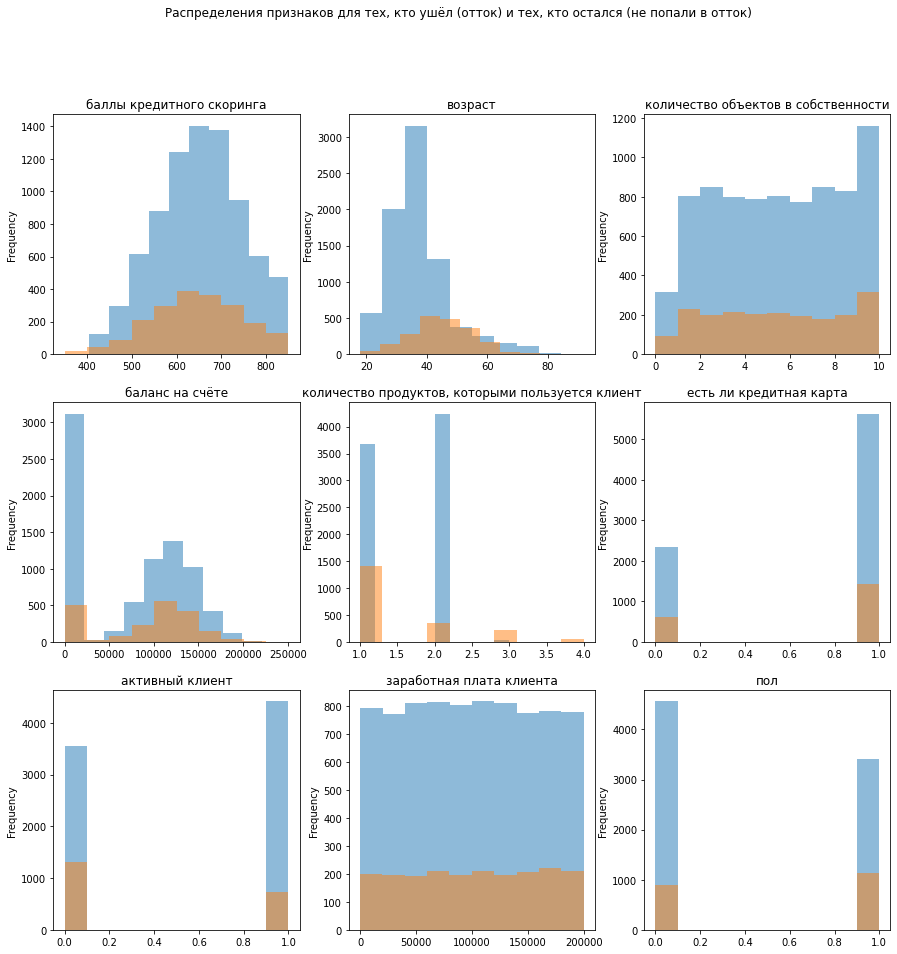

In [15]:
fig, axs = plt.subplots(3,3)
fig.suptitle('Распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)')
fig.set_figheight(15)
fig.set_figwidth(15)
data.groupby('churn')['score'].plot.hist(ax=axs[0][0], alpha=0.5)
axs[0][0].set_title('баллы кредитного скоринга')
data.groupby('churn')['age'].plot.hist(ax=axs[0][1], alpha=0.5)
axs[0][1].set_title('возраст')
data.groupby('churn')['objects'].plot.hist(ax=axs[0][2], alpha=0.5)
axs[0][2].set_title('количество объектов в собственности')
data.groupby('churn')['balance'].plot.hist(ax=axs[1][0], alpha=0.5)
axs[1][0].set_title('баланс на счёте')
data.groupby('churn')['products'].plot.hist(ax=axs[1][1], alpha=0.5)
axs[1][1].set_title('количество продуктов, которыми пользуется клиент')
data.groupby('churn')['creditcard'].plot.hist(ax=axs[1][2], alpha=0.5)
axs[1][2].set_title('есть ли кредитная карта')
data.groupby('churn')['loyalty'].plot.hist(ax=axs[2][0], alpha=0.5)
axs[2][0].set_title('активный клиент')
data.groupby('churn')['estimated_salary'].plot.hist(ax=axs[2][1], alpha=0.5)
axs[2][1].set_title('заработная плата клиента')
data.groupby('churn')['gender_class'].plot.hist(ax=axs[2][2], alpha=0.5)
axs[2][2].set_title('пол')

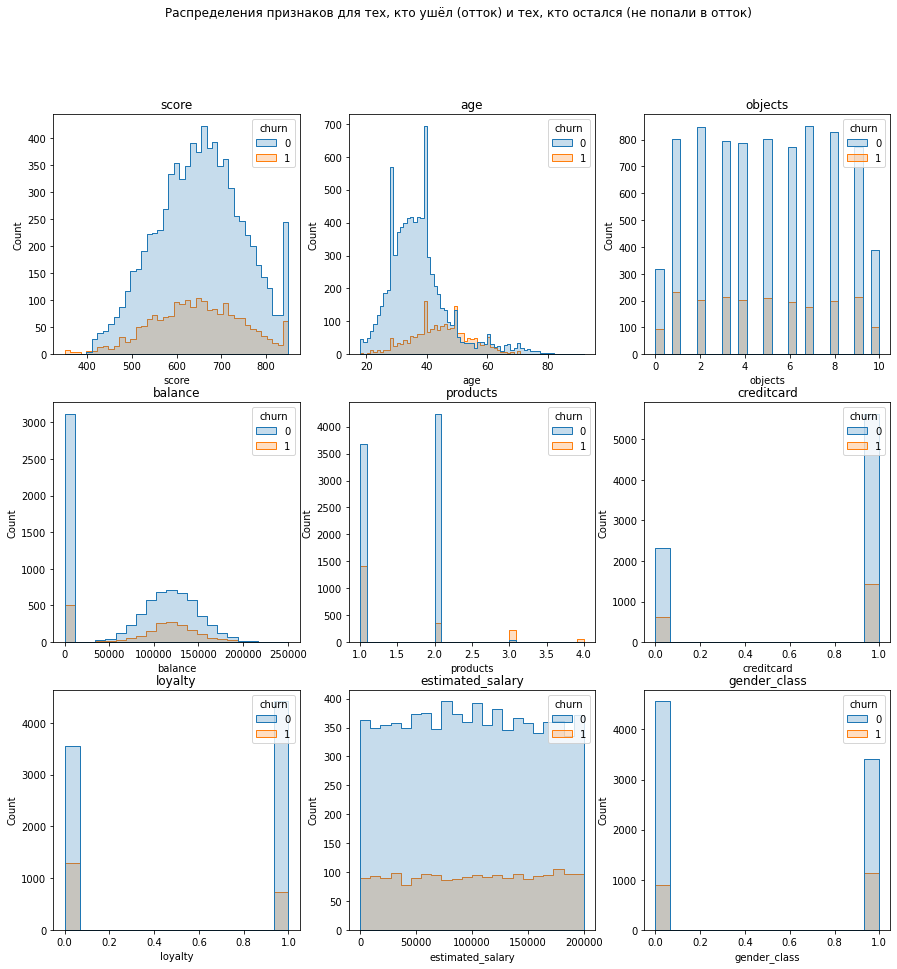

In [16]:
spisok = data.columns.drop(['userid', 'city', 'gender', 'churn'])

fig, axs = plt.subplots(3,3)
fig.suptitle('Распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)')
fig.set_figheight(15)
fig.set_figwidth(15)

a = 0
for i in range(3):
    for j in range(3):
        sns.histplot(ax=axs[i][j], hue ='churn', x = spisok[a], 
            data = data[['churn',spisok[a]]], element="step")
        axs[i][j].set_title(spisok[a])
        a += 1

Можем заметить, что баллы кредитного скоринга, количество объектов в собственности, баланс на счете, наличие кредитной карты и заработная плата распределяются похожим образом у клиентов оставшихся в банке и ушедших в отток.

Различия есть в следующем:
* в среднем из банка уходят клиенты 40-50 лет, в то время как среди оставшихся клиентов средний возраст около 35-40.
* Больше всего уходят тех клиентов, кто пользуется только 1 продуктом банка, в то время у тех что остается, обычно 2 продукта.
* Из банка в основном уходят не активные клиенты (что, в целом, логично)
* В ушедших клиентах преобладают женщины, в то время, как в оставшихся в банке - мужчкины.

In [17]:
pd.cut(data['age'], 4)

0         (36.5, 55.0]
1         (36.5, 55.0]
2         (36.5, 55.0]
3         (36.5, 55.0]
4         (36.5, 55.0]
             ...      
9995      (36.5, 55.0]
9996    (17.926, 36.5]
9997    (17.926, 36.5]
9998      (36.5, 55.0]
9999    (17.926, 36.5]
Name: age, Length: 10000, dtype: category
Categories (4, interval[float64]): [(17.926, 36.5] < (36.5, 55.0] < (55.0, 73.5] < (73.5, 92.0]]

In [18]:
def age_group(row):
    if row['age'] <= 36.5:
        return('under 36.5')
    if row['age'] < 55:
        return('under 55')
    if row['age'] < 73.5:
        return('under 73.5')
    else:
        return('older 73.5')
        

data['age_group'] = data.apply(age_group, axis=1)

Построим матрицу корреляций.

interval columns not set, guessing: ['userid', 'score', 'age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn', 'gender_class']


<AxesSubplot:>

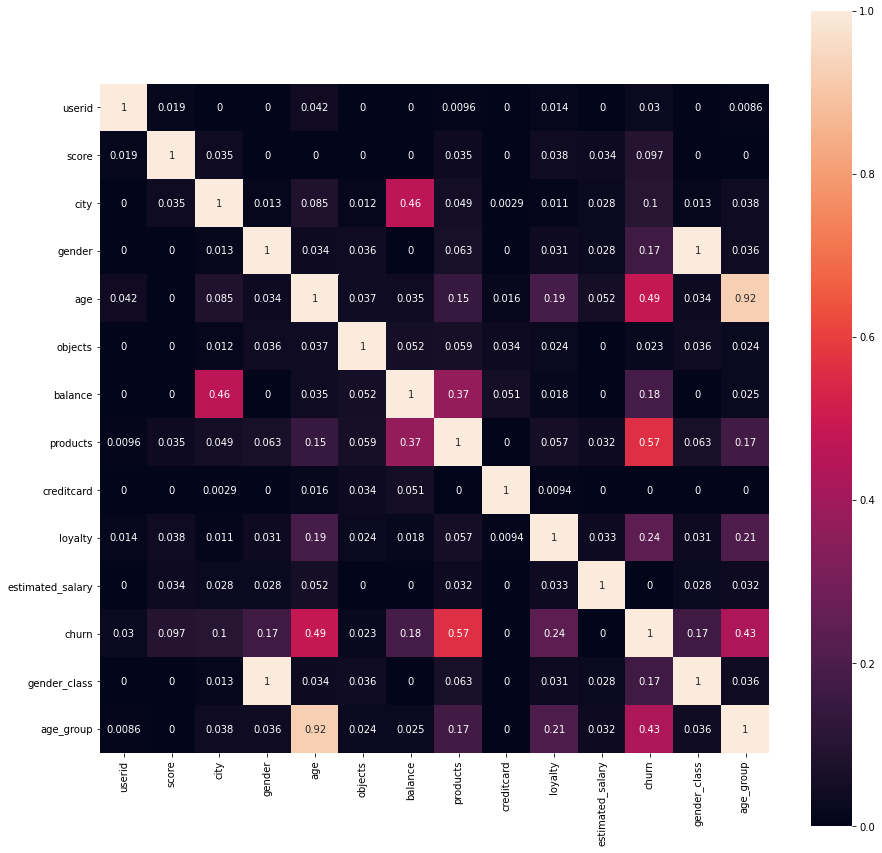

In [19]:
plt.figure(figsize=(15, 15)) 
sns.heatmap(data.phik_matrix(), annot = True, square=True)

Можно заметить следующее:
* Наибольшей корелляцией обладают количество продуктов в пользовании и отток. Достаточно интересно, почему клиенты, которые пользуются большим числом продуктов банка вдруг решают из него уйти.
* Также видна значительная корелляция между оттоком и возрастом клиентов. Видимо, банк больше подходит для молодых клиентов.
* Наблюдается корреляция между городом и балансом на счете - в разных городах доход у клиентов может быть достаточно различен.

# Сегментация  пользователей на основе данных о количестве потребляемых продуктов
<a id='part_1.1'></a>
Разделим клиентов банка на группы по количеству потребляемых продуктов.

[*Назад к оглавлению*](#content)

In [18]:
def classifier(row):
    if row['products'] == 1:
        return('one')
    if row['products'] == 2:
        return('two')
    else:
        return('many')

In [19]:
data['class'] = data.apply(classifier, axis=1)

In [20]:
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_class,age_group,class
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1,1,under 55,one
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,1,under 55,one
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,1,under 55,many
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0,1,under 55,two
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,1,under 55,one


Рассмотрим распределение признаков по группам.

Text(0.5, 1.0, 'пол')

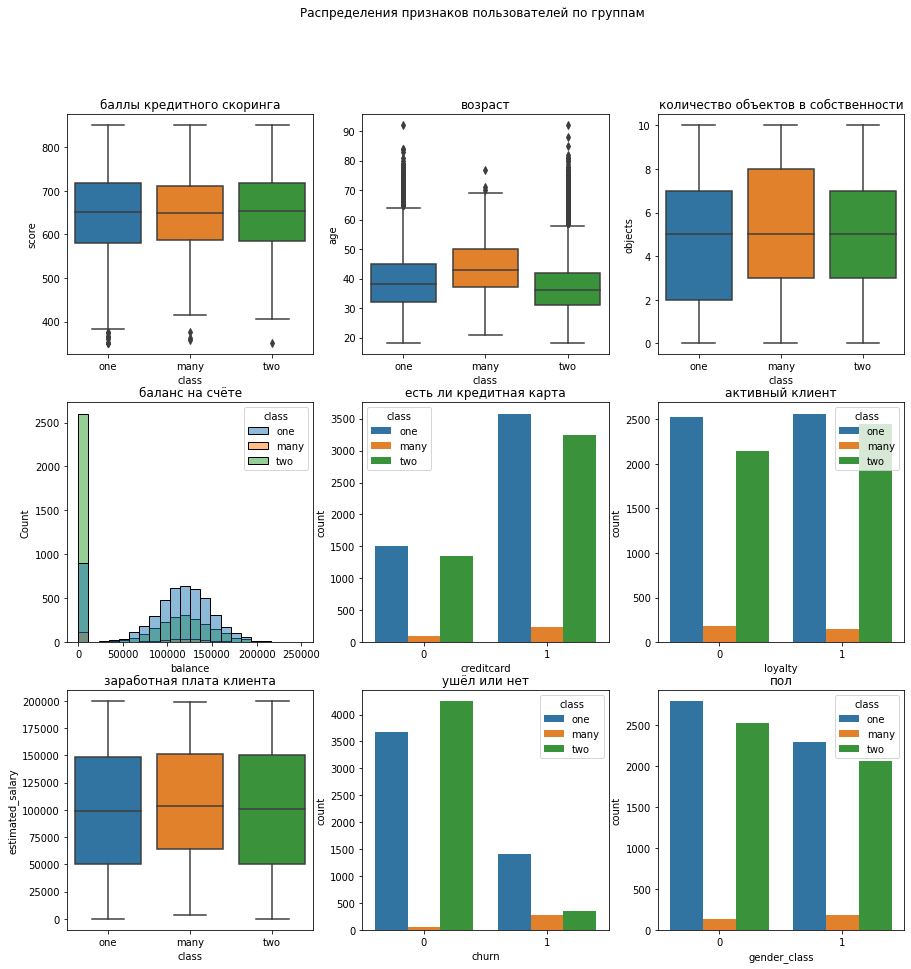

In [21]:
fig, axs = plt.subplots(3,3)
fig.suptitle('Распределения признаков пользователей по группам')
fig.set_figheight(15)
fig.set_figwidth(15)
sns.boxplot(ax=axs[0][0], x ='class',y = 'score', 
            data = data[['class','score']])
axs[0][0].set_title('баллы кредитного скоринга')

sns.boxplot(ax=axs[0][1], x ='class',y = 'age', 
            data = data[['class','age']])
axs[0][1].set_title('возраст')

sns.boxplot(ax=axs[0][2], x ='class',y = 'objects', 
            data = data[['class','objects']])
axs[0][2].set_title('количество объектов в собственности')

sns.histplot(ax=axs[1][0], hue ='class',x = 'balance', 
            data = data[['class','balance']])
axs[1][0].set_title('баланс на счёте')

sns.countplot(ax=axs[1][1], data = data[['class','creditcard']], x = 'creditcard', hue = 'class')
axs[1][1].set_title('есть ли кредитная карта')

sns.countplot(ax=axs[1][2], data = data[['class','loyalty']], x = 'loyalty', hue = 'class')
axs[1][2].set_title('активный клиент')

sns.boxplot(ax=axs[2][0], x ='class',y = 'estimated_salary', 
            data = data[['class','estimated_salary']])
axs[2][0].set_title('заработная плата клиента')

sns.countplot(ax=axs[2][1], data = data[['class','churn']], x = 'churn', hue = 'class')
axs[2][1].set_title('ушёл или нет')

sns.countplot(ax=axs[2][2], data = data[['class','gender_class']], x = 'gender_class', hue = 'class')
axs[2][2].set_title('пол')

Можно сделать следующие выводы:
* Баллы кредитного рейтинга у всех групп распределились примерно одинаково
* Люди с несколькими продуктами (3,4) старше тех, кто имеет только 1-2 продукта.
* В среднем количество объектов собственности во всех группах одинаковое, однако клиенты с одним проуктом тяготеют к меньшему числу объектов, а клиенты с 34 продуктами - к большему.
* Можем заметить большое число пользователей с нулевым балансом - в большей степени это клиенты, которые не имеют дебетовой карты. Среди них лидируют клиенты, использующие 2 продукта банка. В целом можно заметить, что распределение баланса на счете между разными группами клиентов достаточно похоже.
* Соотношение по клиентам имеющим и не имеющим кредитную карту, по активности и полу в целом похоже на общую картину.
* Заработная плата у клиентов всех групп примерно одинакова.
* А вот уходят клиенты с 3-4 продуктами куда активнее, чем клиенты с одним или двумя продуктами.

# Формулировка и проверка статистических гипотез

[*Назад к оглавлению*](#content)

<a id='part_2.1'></a>
Сформулируем нулевую гипотезу:

**Средний доход тех клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, одинаков.**

Тогда альтернативная гипотеза будет:

**Средний доход тех клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различен.**

Для начала посмотрим, похожи ли дисперсии выборок.

In [22]:
print('Дисперсия выборки клиентов с одним продуктом равна', np.var(data[data['class'] == 'one']['estimated_salary']))
print('Дисперсия выборки клиентов с двумя продуктами равна', np.var(data[data['class'] == 'two']['estimated_salary']))

Дисперсия выборки клиентов с одним продуктом равна 3289938391.6508718
Дисперсия выборки клиентов с двумя продуктами равна 3339048942.6448092


Дисперсии, очевидно, похожи.

In [23]:
alpha = 0.05

results = st.ttest_ind(data[data['class'] == 'one']['estimated_salary'], 
                       data[data['class'] == 'two']['estimated_salary'],
                       equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.41047183624949335
Не получилось отвергнуть нулевую гипотезу


Построим гистограмы распределений, чтобы посмотреть, действительно ли результаты похожи на действительность.

Text(0.5, 1.0, 'Распределение заработной платы клиентов, которые пользуются одним продуктом банка')

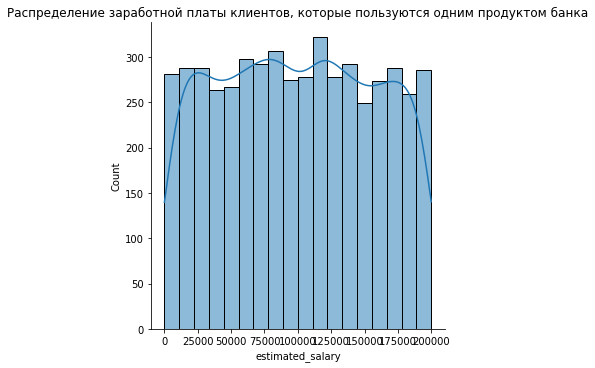

In [24]:
sns.displot(data[data['class'] == 'one']['estimated_salary'], kde=True)
plt.title('Распределение заработной платы клиентов, которые пользуются одним продуктом банка')

Text(0.5, 1.0, 'Распределение заработной платы клиентов, которые пользуются двумя продуктами банка')

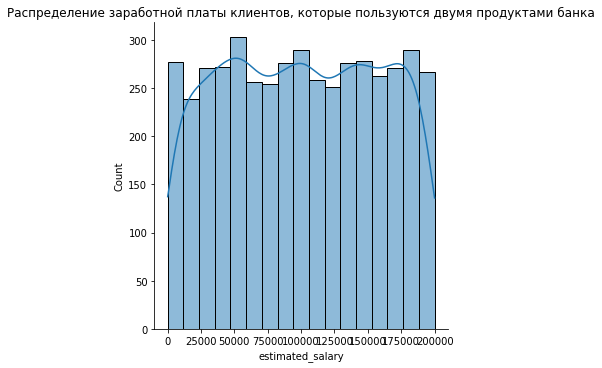

In [25]:
sns.displot(data[data['class'] == 'two']['estimated_salary'], kde=True)
plt.title('Распределение заработной платы клиентов, которые пользуются двумя продуктами банка')

<a id='part_2.2'></a>
Рассмотрим вторую гипотезу. Cформулируем нулевую гипотезу:

**Средние баллы кредитного скоринга тех клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, одинаковы.**

Тогда альтернативная гипотеза будет:

**Средние баллы кредитного скоринга тех клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различны.**

In [26]:
print('Дисперсия выборки клиентов с одним продуктом равна', np.var(data[data['class'] == 'one']['score']))
print('Дисперсия выборки клиентов с двумя продуктами равна', np.var(data[data['class'] == 'two']['score']))

Дисперсия выборки клиентов с одним продуктом равна 9446.702715349866
Дисперсия выборки клиентов с двумя продуктами равна 9226.825405423366


In [27]:
alpha = 0.05

results = st.ttest_ind(data[data['class'] == 'one']['score'], 
                       data[data['class'] == 'two']['score'],
                       equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.1191143371309672
Не получилось отвергнуть нулевую гипотезу


Text(0.5, 1.0, 'Распределение кредитного рейтинга клиентов, которые пользуются одним продуктом банка')

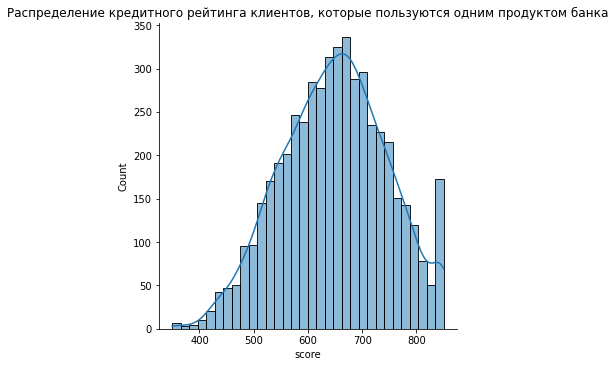

In [28]:
sns.displot(data[data['class'] == 'one']['score'], kde=True)
plt.title('Распределение кредитного рейтинга клиентов, которые пользуются одним продуктом банка')

Text(0.5, 1.0, 'Распределение кредитного рейтинга клиентов, которые пользуются двумя продуктами банка')

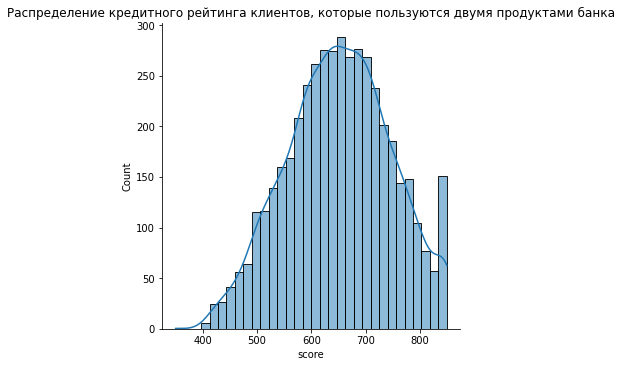

In [29]:
sns.displot(data[data['class'] == 'two']['score'], kde=True)
plt.title('Распределение кредитного рейтинга клиентов, которые пользуются двумя продуктами банка')

Нулевая гипотеза не была отвергнула, однако если бы мы выбрали чуть больший критерий значимости (0,12), то могли бы ее отвергнуть и сказать, что на самом деле выборки различны.

# Вывод
<a id='finish'></a>
Сделаем общие выводы.

[*Назад к оглавлению*](#content)

Портрет среднего пользователя:
* средний балл кредитного скоринга - 600-700,
* Средний возраст около 39 лет
* По количеству объектов собственности складывается следующая ситуация: примерно одинаковое число клиентов обладают от 2 до 9 объектами. Чуть большее - 10.
* По балансу счета виден большой выброс в районе 0, далее значения нормально распределены около 100000.
* Большинство клиентов пользуются 1-2 продуктами. Тех, у кого их 3-4 совсем мало.
* Клиентов с кредитными картами в два раза больше, чем без них.
* Около половины клиентов являются активными
* Около 1/5 клиентов ушли из банка.
* Мужчин чуть больше, чем женщин.

Можем заметить, что баллы кредитного скоринга, количество объектов в собственности, баланс на счете, наличие кредитной карты и заработная плата распределяются похожим образом у клиентов оставшихся в банке и ушедших в отток.

Различия есть в следующем:
* в среднем из банка уходят клиенты 40-50 лет, в то время как среди оставшихся клиентов средний возраст около 35-40.
* Больше всего уходят тех клиентов, кто пользуется только 1 продуктом банка, в то время у тех что остается, обычно 2 продукта.
* Из банка в основном уходят не активные клиенты (что, в целом, логично)
* В ушедших клиентах преобладают женщины, в то время, как в оставшихся в банке - мужчкины.


По количеству продуктов имеет смысл делить клиентов на три группы: пользующихся 1, 2 и 3-4 продуктами.
* Баллы кредитного рейтинга у всех групп распределились примерно одинаково
* Люди с несколькими продуктами (3,4) старше тех, кто имеет только 1-2 продукта.
* В среднем количество объектов собственности во всех группах одинаковое, однако клиенты с одним проуктом тяготеют к меньшему числу объектов, а клиенты с 34 продуктами - к большему.
* В среднем баланс на счете у  клиентов с 3-4 продуктами - около 100000, однако распределение смещено к 0. Клиенты с 1 продуктом в среднем имеют на счете около 110000
* Соотношение по клиентам имеющим и не имеющим кредитную карту, активности и полу в целом похоже на общую картину.
* Заработная плата у клиентов всех групп примерно одинакова.
* А вот уходят клиенты с 3-4 продуктами куда активнее, чем клиенты с одним или двумя продуктами.

Можно с достаточно сильной уверенностью сказать, что доход тех клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, одинаков.

С несколько большими сомнениями мы можем сказать, что баллы кредитного скоринга тех клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, одинаковы.

Можно сделать следующие рекомендации:
* Стоит сконцентрироваться на молодых клиентах - они куда меньше уходят в отток. Можно предлагать им повышенный кешбек, работать над удобством приложения банка.
* Стоит разобраться, почему клиенты старшего возраста уходят. Возможно, для них слишком сложное приложение или же стоит предлагать им какие-то альтернативы - качественную поддержку по телефону или в офисе банка. Возможно, стоит привлекать их какими-то акциями - например, повышенными ставками по вкладам.
* Судя по тому, что 2/3 клиентов имеют кредитную карту - возможно, это или действительно выгодно или же в банке есть какая-то акция. Не нужно концентрироваться только на этом, так как это не тот продукт, что сможет долго удерживать клиента, необходимо заинтересовывать их прочими более долгосрочными проектами.
* В связи с тем, что в основном уходят клиенты с одним продуктом, необходимо стараться заинтересовать клиентов иными продуктами банка - дебетовыми картами с процентом на остаток на счете или выгодными вкладами.